In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [3]:
#read this csv file /Users/tommi/Desktop/Uni_documents/Data/dragon-portfolio/commodity.csv
commodity = pd.read_csv('/Users/tommi/Desktop/Uni_documents/Data/dragon-portfolio/commodity.csv')

#/Users/tommi/Desktop/Uni_documents/Data/dragon-portfolio/EHI640_returns10-02-2025.csv
benchmark_volatility = pd.read_csv('/Users/tommi/Desktop/Uni_documents/Data/dragon-portfolio/EHI640_returns10-02-2025.csv')

#/Users/tommi/Desktop/Uni_documents/Data/dragon-portfolio/equity.csv
equity = pd.read_csv('/Users/tommi/Desktop/Uni_documents/Data/dragon-portfolio/equity.csv')

#/Users/tommi/Desktop/Uni_documents/Data/dragon-portfolio/fixed_income.csv
fixed_income = pd.read_csv('/Users/tommi/Desktop/Uni_documents/Data/dragon-portfolio/fixed_income.csv')

#/Users/tommi/Desktop/Uni_documents/Data/dragon-portfolio/gold.csv
gold = pd.read_csv('/Users/tommi/Desktop/Uni_documents/Data/dragon-portfolio/gold.csv')

#/Users/tommi/Desktop/Uni_documents/Data/dragon-portfolio/volatility-daily.csv
volatility_daily = pd.read_csv('/Users/tommi/Desktop/Uni_documents/Data/dragon-portfolio/volatility-daily.csv')

#read this csv file /Users/tommi/Desktop/Uni_documents/Data/dragon-portfolio/volatility-monthly.csv
volatility_monthly = pd.read_csv('/Users/tommi/Desktop/Uni_documents/Data/dragon-portfolio/volatility-monthly.csv')

vix = pd.read_csv('/Users/tommi/Desktop/Uni_documents/Data/dragon-portfolio/vix_data.csv')
#drop the first two rows of vix
vix = vix.iloc[2:]
#rename the Price column to Dates
vix = vix.rename(columns = {'Price':'Dates'})

#rename the Close column to VIX
vix = vix.rename(columns = {'Close':'VIX'})

#round the VIX column to 2 decimal places
vix['VIX'] = pd.to_numeric(vix['VIX'], errors='coerce')
vix['VIX'] = vix['VIX'].round(2)

In [4]:
# Convert Dates to datetime in all DataFrames (use dayfirst=True to handle different formats)
commodity['Dates'] = pd.to_datetime(commodity['Dates'], dayfirst=True)
equity['Dates'] = pd.to_datetime(equity['Dates'], dayfirst=True)
fixed_income['Dates'] = pd.to_datetime(fixed_income['Dates'], dayfirst=True)
gold['Dates'] = pd.to_datetime(gold['Dates'], dayfirst=True)
vix['Dates'] = pd.to_datetime(vix['Dates'])

#ensure all df start and end at the same date, start at 2006-06-06 and end at 2025-02-07
commodity = commodity[(commodity['Dates'] >= '2006-06-06') & (commodity['Dates'] <= '2025-02-07')]
equity = equity[(equity['Dates'] >= '2006-06-06') & (equity['Dates'] <= '2025-02-07')]
fixed_income = fixed_income[(fixed_income['Dates'] >= '2006-06-06') & (fixed_income['Dates'] <= '2025-02-07')]
gold = gold[(gold['Dates'] >= '2006-06-06') & (gold['Dates'] <= '2025-02-07')]
vix = vix[(vix['Dates'] >= '2006-06-06') & (vix['Dates'] <= '2025-02-07')]


In [5]:
commodity_selected = commodity[['Dates', 'DJP US Equity']].copy()
volatility_selcted = vix[['Dates', 'VIX']].copy()
equity_selected = equity[['Dates', 'IVV US Equity']].copy()
fixed_income_selected = fixed_income[['Dates', 'TLT US Equity']].copy()
gold_selected = gold[['Dates', 'XAU Curncy']].copy()


In [6]:
# Merge DataFrames on Dates using outer join to keep all available data
dragon_portfolio = commodity_selected.merge(volatility_selcted, on='Dates', how='outer')
dragon_portfolio = dragon_portfolio.merge(equity_selected, on='Dates', how='outer')
dragon_portfolio = dragon_portfolio.merge(fixed_income_selected, on='Dates', how='outer')
dragon_portfolio = dragon_portfolio.merge(gold_selected, on='Dates', how='outer')


In [7]:
# Display the first rows of the merged DataFrame
dragon_portfolio.head()

,Dates,DJP US Equity,VIX,IVV US Equity,TLT US Equity,XAU Curncy
0,2006-06-06,50.00,17.34,126.92,85.08,630.65
1,2006-06-07,50.20,17.80,126.05,85.10,626.45
2,2006-06-08,49.25,18.35,126.00,85.27,613.25
3,2006-06-09,48.85,18.12,125.60,85.72,607.45
4,2006-06-12,48.80,20.96,124.05,85.79,604.25


In [8]:
#rename the columns of the dataframe to the following names DJP US Equity to Commodity - DJP US Equity, VIX to Volatility - VIX Index, IVV US Equity to Equities - IVV US Equity, TLT US Equity to Fixed Income - TLT US Equity, XAU Curncy to Gold - XAU Curncy
dragon_portfolio = dragon_portfolio.rename(columns = {'DJP US Equity':'Commodity - DJP US Equity', 'VIX':'Volatility - VIX Index', 'IVV US Equity':'Equities - IVV US Equity', 'TLT US Equity':'Fixed Income - TLT US Equity', 'XAU Curncy':'Gold - XAU Curncy'})

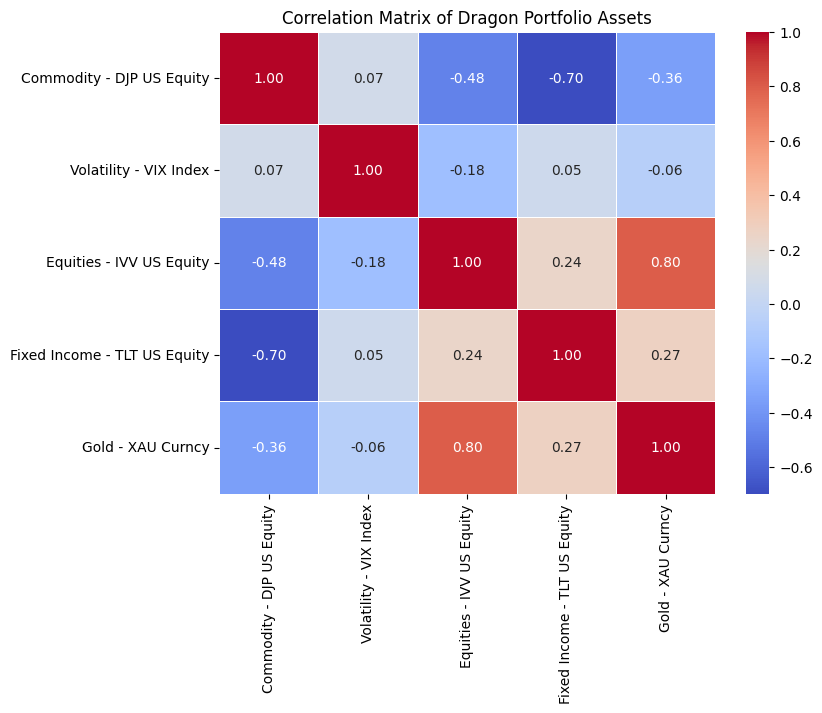

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix (excluding Dates)
correlation_matrix = dragon_portfolio.drop(columns=["Dates"]).corr()

# Set up the figure size
plt.figure(figsize=(8, 6))

# Create a heatmap with annotations
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, cbar=True)

# Add title
plt.title("Correlation Matrix of Dragon Portfolio Assets")

# Show the plot
plt.show()

In [10]:
dragon_portfolio.head()

,Dates,Commodity - DJP US Equity,Volatility - VIX Index,Equities - IVV US Equity,Fixed Income - TLT US Equity,Gold - XAU Curncy
0,2006-06-06,50.00,17.34,126.92,85.08,630.65
1,2006-06-07,50.20,17.80,126.05,85.10,626.45
2,2006-06-08,49.25,18.35,126.00,85.27,613.25
3,2006-06-09,48.85,18.12,125.60,85.72,607.45
4,2006-06-12,48.80,20.96,124.05,85.79,604.25


In [11]:
# Convert date column to datetime format
dragon_portfolio['Dates'] = pd.to_datetime(dragon_portfolio['Dates'])
dragon_portfolio.set_index('Dates', inplace=True)

In [12]:
#create a new column called 'Portfolio' which is the weighted sum of the Commodity - DJP US Equity: 18%	Volatility - VIX Index: 21%	Equities - IVV US Equity: 24%	Fixed Income - TLT US Equity: 18%	Gold - XAU Curncy: 19% columns in the dataframe
weights = [0.18, 0.21, 0.24, 0.18, 0.19]



In [13]:
#create a percentage return df from the dragon_portfolio df
percentage_return_df = dragon_portfolio.pct_change()

percentage_return_df['Portfolio'] = (percentage_return_df['Commodity - DJP US Equity'] * weights[0]) + (percentage_return_df['Volatility - VIX Index'] * weights[1]) + (percentage_return_df['Equities - IVV US Equity'] * weights[2]) + (percentage_return_df['Fixed Income - TLT US Equity'] * weights[3]) + (percentage_return_df['Gold - XAU Curncy'] * weights[4])



/var/folders/ly/mr0404x501n5fsqtt6yhhbtm0000gn/T/ipykernel_41115/3601095891.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  percentage_return_df = dragon_portfolio.pct_change()


In [14]:
percentage_return_df.head()

,Commodity - DJP US Equity,Volatility - VIX Index,Equities - IVV US Equity,Fixed Income - TLT US Equity,Gold - XAU Curncy,Portfolio
Dates,,,,,,
2006-06-06,NaN,NaN,NaN,NaN,NaN,NaN
2006-06-07,0.004000,0.026528,-0.006855,0.000235,-0.006660,0.003423
2006-06-08,-0.018924,0.030899,-0.000397,0.001998,-0.021071,-0.000657
2006-06-09,-0.008122,-0.012534,-0.003175,0.005277,-0.009458,-0.005703
2006-06-12,-0.001024,0.156733,-0.012341,0.000817,-0.005268,0.028914


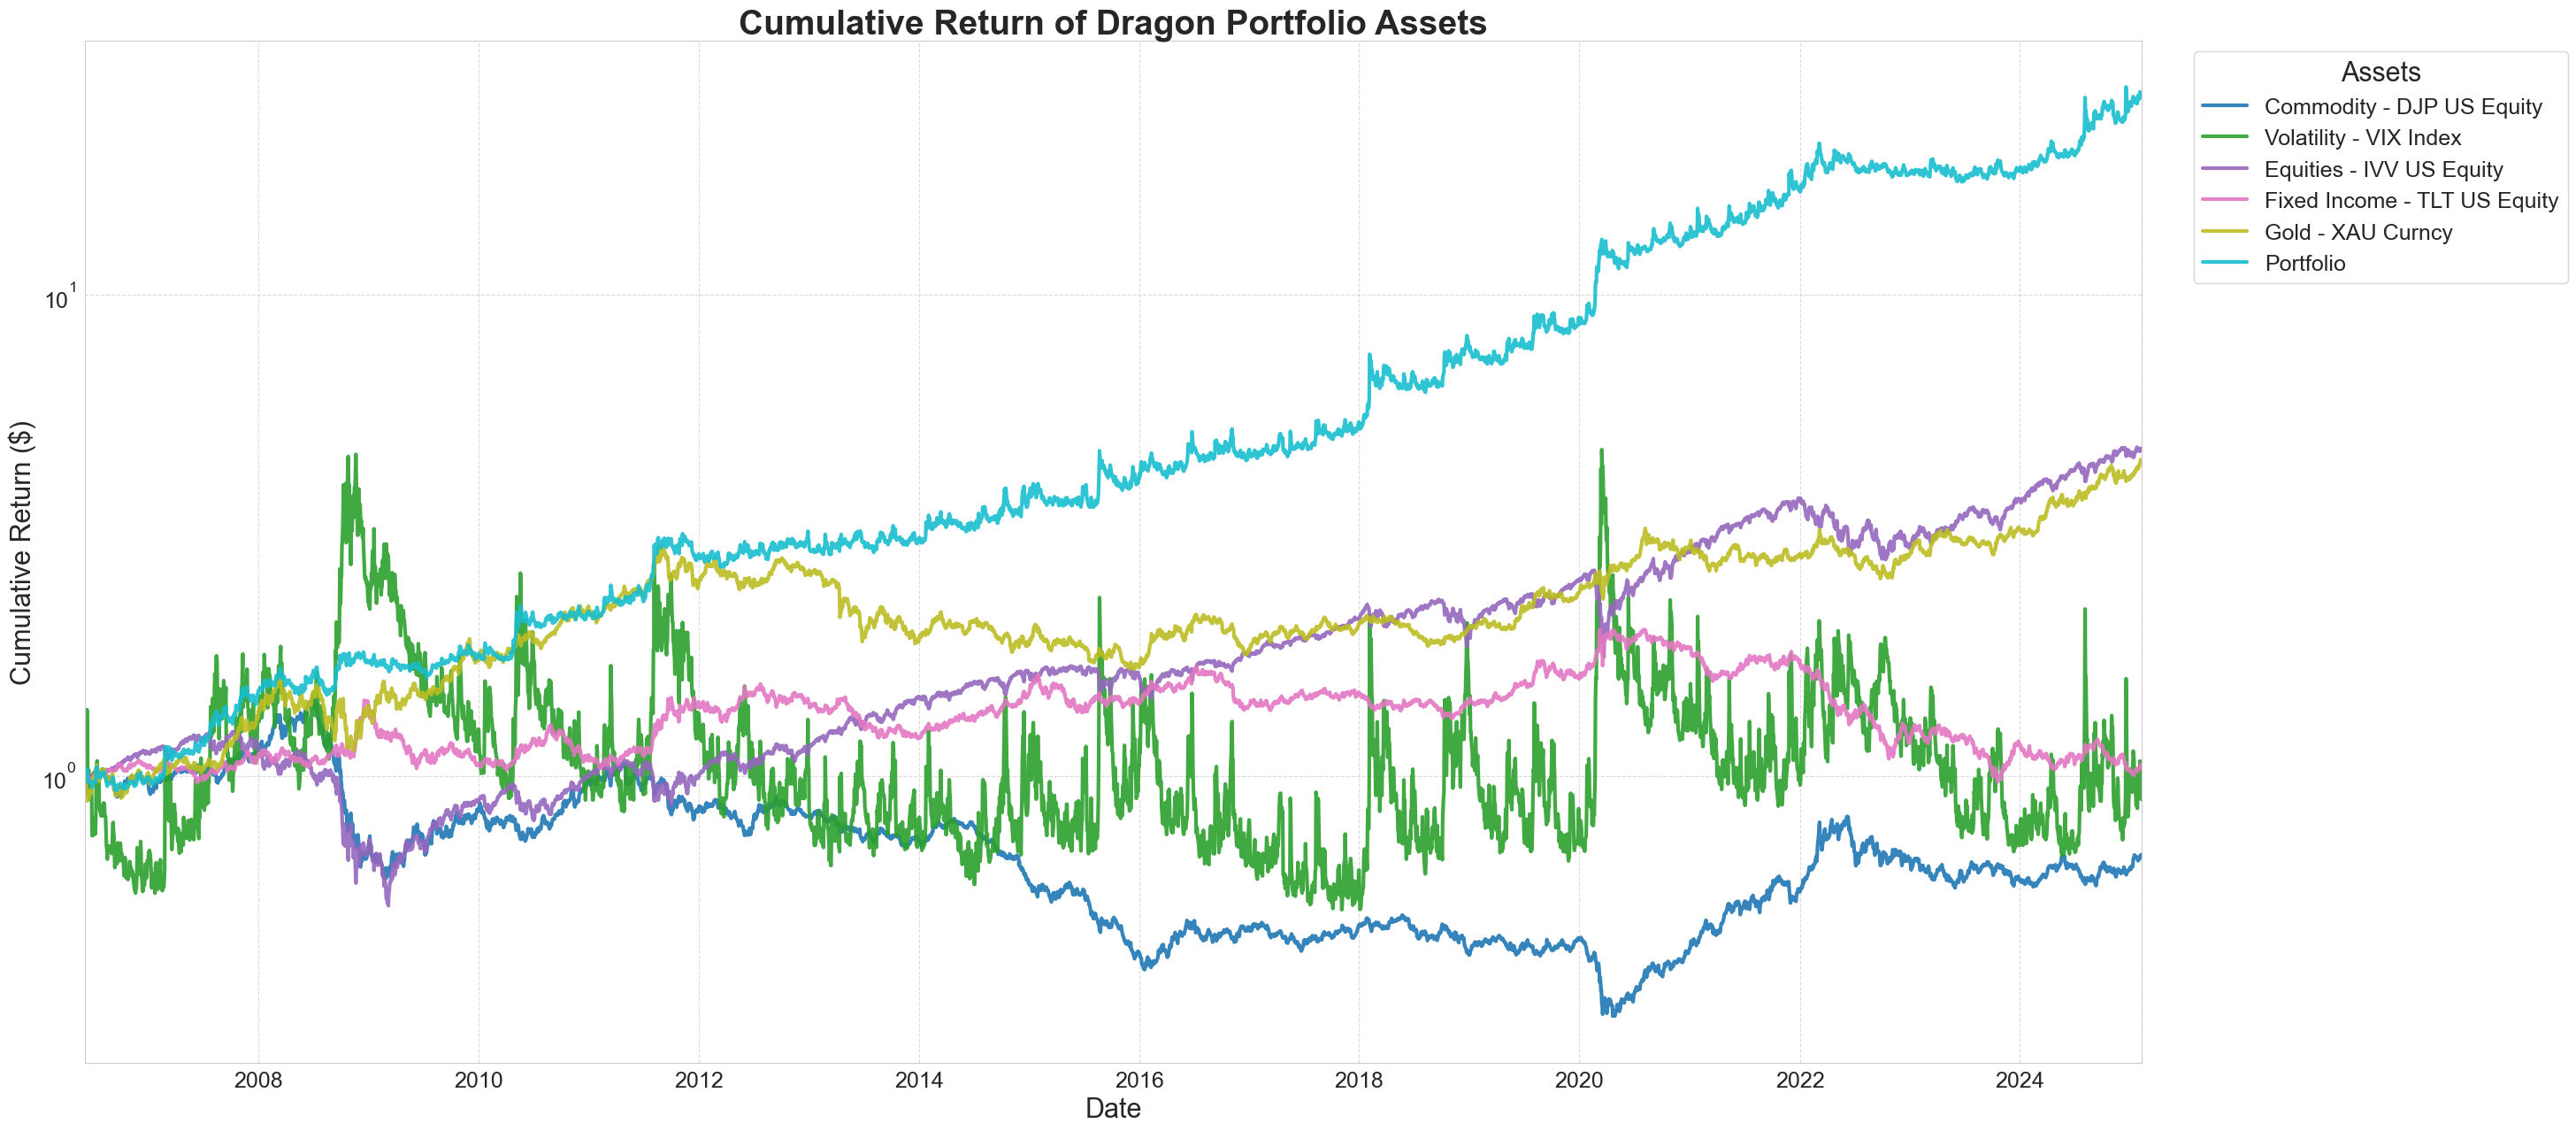

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style for better aesthetics
sns.set_style("whitegrid")

# Maximize figure size
fig, ax = plt.subplots(figsize=(30, 15))  # Wider and taller figure

# Compute cumulative returns starting from $1
cumulative_returns = (1 * (1 + percentage_return_df).cumprod())

# Plot with better distinction
cumulative_returns.plot(ax=ax, linewidth=3, cmap="tab10", alpha=0.9)

# Add title and labels with improved font sizes
ax.set_title("Cumulative Return of Dragon Portfolio Assets", fontsize=28, fontweight='bold')
ax.set_ylabel("Cumulative Return ($)", fontsize=22)
ax.set_xlabel("Date", fontsize=22)

# Log scale for better visualization
ax.set_yscale("log")

# Increase tick sizes for better readability
ax.tick_params(axis="both", labelsize=18)

# Add a legend outside the plot
ax.legend(
    title="Assets", bbox_to_anchor=(1.02, 1), loc="upper left", fontsize=18, title_fontsize=22
)

# Add a grid for readability
ax.grid(True, linestyle="--", alpha=0.7)

# Show the plot
plt.show()


In [16]:
#calculate the annualized return of the portfolio in the percentage_return_df
annualized_return = percentage_return_df['Portfolio'].mean() * 252
annualized_return

0.19650935765988534

In [17]:
#calculate the annualized volatility of the portfolio in the percentage_return_df
annualized_volatility = percentage_return_df['Portfolio'].std() * np.sqrt(252)
annualized_volatility

0.23865106671112576

In [18]:
#calculate the Sharpe ratio of the portfolio in the percentage_return_df
sharpe_ratio = annualized_return / annualized_volatility
sharpe_ratio


0.8234170513796585

In [19]:
#calcualte the annualized return of the assets in the percentage_return_df
annualized_return_assets = percentage_return_df.mean() * 252
annualized_return_assets

Commodity - DJP US Equity      -0.004019
Volatility - VIX Index          0.730757
Equities - IVV US Equity        0.098914
Fixed Income - TLT US Equity    0.013556
Gold - XAU Curncy               0.092602
Portfolio                       0.196509
dtype: float64

In [20]:
#calcualte the annualized volatility of the assets in the percentage_return_df
annualized_volatility_assets = percentage_return_df.std() * np.sqrt(252)
annualized_volatility_assets

Commodity - DJP US Equity       0.175600
Volatility - VIX Index          1.261687
Equities - IVV US Equity        0.190775
Fixed Income - TLT US Equity    0.148828
Gold - XAU Curncy               0.169514
Portfolio                       0.238651
dtype: float64

In [21]:
#calcualte the standard deviation of the assets in the percentage_return_df
standard_deviation_assets = percentage_return_df.std()
standard_deviation_assets

Commodity - DJP US Equity       0.011062
Volatility - VIX Index          0.079479
Equities - IVV US Equity        0.012018
Fixed Income - TLT US Equity    0.009375
Gold - XAU Curncy               0.010678
Portfolio                       0.015034
dtype: float64